# ThoughtWorks: HerTECH HACKATHON


## DATA PRE-PROCESSING:

### Exploratory Data Analysis and Data Pre-Processing:

#### Importing python libraries:

In [1]:
import pandas as pd
import numpy as np

import warnings
def ignore_warn(*args, **kwargs):pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import seaborn as sns
 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#from IPython.display import display
#pd.set_option('display.max_columns', 100)

#### Read the training & test data "csv formats":

In [2]:
df_tomato=pd.read_csv("final_tomato.csv")

####  We take an overview of the whole training dataset by observing the rows and column values.
> Pandas head() method is used to return top n (5 by default) rows of a data frame or series.


In [3]:
df_tomato.head()

,State,District,Market,Variety of Product,Arrival Date,Min Price,Max Price,Modal_Price,Max Temperature,Min Temperature,Humidity (in Percentage),Avg Rainfall (in mm)
0,Maharashtra,Ahmednagar,Ahmednagar,Other,Jan,300,600,500,28,18,72,5
1,Maharashtra,Ahmednagar,Ahmednagar,Other,Jan,300,800,600,31,19,68,5
2,Maharashtra,Ahmednagar,Ahmednagar,Other,Jan,100,500,400,29,16,64,5
3,Maharashtra,Ahmednagar,Ahmednagar,Other,Jan,100,400,350,32,19,68,5
4,Maharashtra,Ahmednagar,Ahmednagar,Other,Jan,400,800,600,28,16,65,5


#### This .info() method can be used for observing the attributes before deciding on pre-processing needed.
> This .info() method will give us the information on column names, datatypes, values, and memory used for attributes.

In [4]:
df_tomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
State                       120 non-null object
District                    120 non-null object
Market                      120 non-null object
Variety of Product          120 non-null object
Arrival Date                120 non-null object
Min Price                   120 non-null int64
Max Price                   120 non-null int64
Modal_Price                 120 non-null int64
Max Temperature             120 non-null int64
Min Temperature             120 non-null int64
Humidity (in Percentage)    120 non-null int64
Avg Rainfall (in mm)        120 non-null int64
dtypes: int64(7), object(5)
memory usage: 11.3+ KB


In [5]:
y_train = df_tomato.Modal_Price

In [6]:
df_tomato.drop(columns=['State','District','Market','Variety of Product','Modal_Price'], axis=1, inplace=True)

In [7]:
df_tomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
Arrival Date                120 non-null object
Min Price                   120 non-null int64
Max Price                   120 non-null int64
Max Temperature             120 non-null int64
Min Temperature             120 non-null int64
Humidity (in Percentage)    120 non-null int64
Avg Rainfall (in mm)        120 non-null int64
dtypes: int64(6), object(1)
memory usage: 6.6+ KB


In [8]:
df_tomato_na = (df_tomato.isnull().sum() / len(df_tomato)) * 100
df_tomato_na = df_tomato_na.drop(df_tomato_na[df_tomato_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_tomato_na})
missing_data.head(20)

,Missing Ratio


In [9]:
df_tomato["Min Price"] = df_tomato["Min Price"].fillna(0)
df_tomato["Max Price"] = df_tomato["Max Price"].fillna(0)
#df_tomato["Modal Price"] = df_tomato["Modal Price"].fillna(0)
df_tomato["Max Temperature"] = df_tomato["Max Temperature"].fillna(0)
df_tomato["Min Temperature"] = df_tomato["Min Temperature"].fillna(0)
df_tomato["Humidity (in Percentage)"] = df_tomato["Humidity (in Percentage)"].fillna(0)
df_tomato["Avg Rainfall (in mm)"] = df_tomato["Avg Rainfall (in mm)"].fillna(0)


In [10]:
df_tomato_na = (df_tomato.isnull().sum() / len(df_tomato)) * 100
df_tomato_na = df_tomato_na.drop(df_tomato_na[df_tomato_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_tomato_na})
missing_data.head(20)

,Missing Ratio


In [11]:
df_tomato = pd.get_dummies(df_tomato)

In [12]:

df_tomato['Min Price'] = df_tomato['Min Price'].astype('int')
df_tomato['Max Price'] = df_tomato['Max Price'].astype('int')
#df_tomato['Modal Price'] = df_tomato['Modal Price'].astype('int')
df_tomato['Max Temperature'] = df_tomato['Max Temperature'].astype('int')
df_tomato['Min Temperature'] = df_tomato['Min Temperature'].astype('int')
df_tomato['Humidity (in Percentage)'] = df_tomato['Humidity (in Percentage)'].astype('int')
df_tomato['Avg Rainfall (in mm)'] = df_tomato['Avg Rainfall (in mm)'].astype('int')

In [13]:
df_tomato.head()

,Min Price,Max Price,Max Temperature,Min Temperature,Humidity (in Percentage),Avg Rainfall (in mm),Arrival Date _Apr,Arrival Date _Aug,Arrival Date _Dec,Arrival Date _Feb,Arrival Date _Jan,Arrival Date _Jul,Arrival Date _Jun,Arrival Date _Mar,Arrival Date _May,Arrival Date _Nov,Arrival Date _Oct,Arrival Date _Sep
0,300,600,28,18,72,5,0,0,0,0,1,0,0,0,0,0,0,0
1,300,800,31,19,68,5,0,0,0,0,1,0,0,0,0,0,0,0
2,100,500,29,16,64,5,0,0,0,0,1,0,0,0,0,0,0,0
3,100,400,32,19,68,5,0,0,0,0,1,0,0,0,0,0,0,0
4,400,800,28,16,65,5,0,0,0,0,1,0,0,0,0,0,0,0


In [14]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_tomato, y_train, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#y_test.drop(y_test.iloc[504,:]) 

(84, 18) (84,)
(36, 18) (36,)


#### Implementing Gradient Boosting Model:
> The Gradient Boost model is used with L2 Regularization method, So all the outlier detection and handling will be done by L2 and scaling, normalization will also be handled.The AUC score is calculated along with the model.

In [15]:
L_Reg = LinearRegression()
model = L_Reg.fit(X_train, y_train)
predictions = L_Reg.predict(X_test)

#### Predicting test data:

In [16]:
# Predict test set
Y_test_pred = L_Reg.predict(X_test)


In [17]:
print(Y_test_pred)


[ 434.88313299  586.08722819  303.85877541  638.93296402  315.68877702
  313.40581356  292.21956066  289.33376253  950.76989201  566.93843592
  906.47046688  874.27237146  414.87663595  471.22959164  506.17180515
  467.37022166 1180.92881822  950.42299583  335.39302045  804.10340461
  516.96843067  253.49416697  796.57230919 1302.85550509  753.97787964
  931.29352973  309.86988336  469.41427254  302.91355758  922.80814717
  368.4378405   619.85185381  304.02537857  715.70586959  459.55280603
  592.39084871]


Text(0, 0.5, 'Predicted Values')

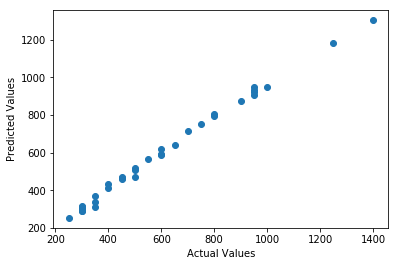

In [18]:
plt.scatter(y_test, Y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [19]:
print (model.score(X_test, y_test))


0.9909618748703909
